# A. Data Collection

#IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt
import seaborn as sns
#import pickle
import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format

#IMPORT DATA

In [2]:
df_train = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.0","406,597.5","24,700.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,"270,000.0","1,293,502.5","35,698.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.0","135,000.0","6,750.0",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,"135,000.0","312,682.5","29,686.5",...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,"121,500.0","513,000.0","21,865.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.0","406,597.5","24,700.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,"270,000.0","1,293,502.5","35,698.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.0","135,000.0","6,750.0",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,"135,000.0","312,682.5","29,686.5",...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,"121,500.0","513,000.0","21,865.5",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# B. Data Preprocessing

# Feature Selection

Terdapat 122 fitur pada data application_train, namun hanya beberapa kolom dengan informasi terkait background dan kepemilikan para debitur (income, pekerjaan, realti, dsb) serta kolom terkait kredit yang diambil (jumlah kredit dll) yang dipilih sebagai data training.

In [5]:
data_train= df_train[['SK_ID_CURR','TARGET', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']]

In [6]:
data_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE
0,100002,1,M,Cash loans,N,Y,2,0,"202,500.0","406,597.5","24,700.5","351,000.0",Secondary / secondary special,House / apartment,Working
1,100003,0,F,Cash loans,N,N,1,0,"270,000.0","1,293,502.5","35,698.5","1,129,500.0",Higher education,House / apartment,State servant
2,100004,0,M,Revolving loans,Y,Y,2,0,"67,500.0","135,000.0","6,750.0","135,000.0",Secondary / secondary special,House / apartment,Working
3,100006,0,F,Cash loans,N,Y,2,0,"135,000.0","312,682.5","29,686.5","297,000.0",Secondary / secondary special,House / apartment,Working
4,100007,0,M,Cash loans,N,Y,2,0,"121,500.0","513,000.0","21,865.5","513,000.0",Secondary / secondary special,House / apartment,Working


# Exploratory Data Analysis

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CODE_GENDER                  307511 non-null  object 
 3   NAME_CONTRACT_TYPE           307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 7   CNT_CHILDREN                 307511 non-null  int64  
 8   AMT_INCOME_TOTAL             307511 non-null  float64
 9   AMT_CREDIT                   307511 non-null  float64
 10  AMT_ANNUITY                  307499 non-null  float64
 11  AMT_GOODS_PRICE              307233 non-null  float64
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [8]:
#Observasi Data Numerik
data_numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data_train.select_dtypes(include=data_numerics).columns)
print(data_train.select_dtypes(include=data_numerics).shape)
data_numerics = data_train.select_dtypes(include=data_numerics)

Index(['SK_ID_CURR', 'TARGET', 'REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
      dtype='object')

(307511, 8)


In [9]:
#Setelah mengetahui kolom mana saja yang merupakan data numerik, diambil kolom-kolom yang relevan
data_numerics.drop(['SK_ID_CURR'], axis=1, inplace=True)
data_numerics.describe()

,TARGET,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,"307,511.0","307,511.0","307,511.0","307,511.0","307,511.0","307,499.0","307,233.0"
mean,0.1,2.0,0.4,"168,797.9","599,026.0","27,108.6","538,396.2"
std,0.3,0.5,0.7,"237,123.1","402,490.8","14,493.7","369,446.5"
min,0.0,1.0,0.0,"25,650.0","45,000.0","1,615.5","40,500.0"
25%,0.0,2.0,0.0,"112,500.0","270,000.0","16,524.0","238,500.0"
50%,0.0,2.0,0.0,"147,150.0","513,531.0","24,903.0","450,000.0"
75%,0.0,2.0,1.0,"202,500.0","808,650.0","34,596.0","679,500.0"
max,1.0,3.0,19.0,"117,000,000.0","4,050,000.0","258,025.5","4,050,000.0"


In [10]:
#Data Kategorikal
display(data_train.select_dtypes(include=['object']).columns)
print(data_train.select_dtypes(include=object).shape)
data_cat = data_train.select_dtypes(include=['object'])

Index(['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

(307511, 7)


In [11]:
data_cat.describe()

,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE
count,307511,307511,307511,307511,307511,307511,307511
unique,3,2,2,2,5,6,8
top,F,Cash loans,N,Y,Secondary / secondary special,House / apartment,Working
freq,202448,278232,202924,213312,218391,272868,158774


#Ternyata selain null values, terdapat juga nilai yang 'salah' (seharusnya tidak ada dalam suatu kategori), seperti pada kolom CODE_GENDER

In [12]:
data_train[(data_train['CODE_GENDER']!='F')&(data_train['CODE_GENDER']!='M')] #terdapat 4 row dengan value tidak seharusnya (XNA)

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE
35657,141289,0,XNA,Revolving loans,Y,Y,3,0,"207,000.0","382,500.0","19,125.0","337,500.0",Secondary / secondary special,Municipal apartment,Working
38566,144669,0,XNA,Revolving loans,N,Y,2,2,"157,500.0","270,000.0","13,500.0","225,000.0",Secondary / secondary special,House / apartment,Working
83382,196708,0,XNA,Revolving loans,N,Y,2,1,"135,000.0","405,000.0","20,250.0","225,000.0",Higher education,House / apartment,Working
189640,319880,0,XNA,Revolving loans,Y,Y,2,0,"247,500.0","540,000.0","27,000.0","900,000.0",Incomplete higher,House / apartment,Commercial associate


In [13]:
#Drop nilai yang salah
data_train.drop(data_train[(data_train['CODE_GENDER']!='F')&(data_train['CODE_GENDER']!='M')].index, inplace=True)

In [14]:
data_train.CODE_GENDER.describe()

count     307507
unique         2
top            F
freq      202448
Name: CODE_GENDER, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

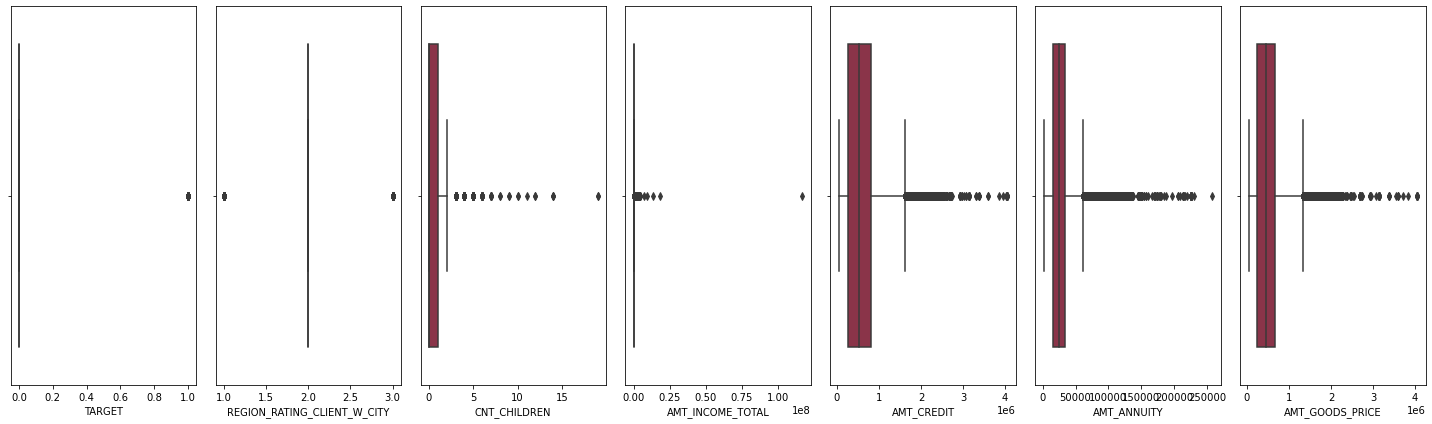

In [15]:
#Visualisasi Persebaran Data Numerik

features = data_numerics.columns
plt.figure(figsize=(20,6))
#plt.boxplot(data_numerics)
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(data_train[features[i]],color='#982642')
    plt.tight_layout()
    
plt.show

In [16]:
data_numerics[features]

,TARGET,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,2,0,"202,500.0","406,597.5","24,700.5","351,000.0"
1,0,1,0,"270,000.0","1,293,502.5","35,698.5","1,129,500.0"
2,0,2,0,"67,500.0","135,000.0","6,750.0","135,000.0"
3,0,2,0,"135,000.0","312,682.5","29,686.5","297,000.0"
4,0,2,0,"121,500.0","513,000.0","21,865.5","513,000.0"
...,...,...,...,...,...,...,...
307506,0,1,0,"157,500.0","254,700.0","27,558.0","225,000.0"
307507,0,2,0,"72,000.0","269,550.0","12,001.5","225,000.0"
307508,0,3,0,"153,000.0","677,664.0","29,979.0","585,000.0"
307509,1,2,0,"171,000.0","370,107.0","20,205.0","319,500.0"


<function matplotlib.pyplot.show(*args, **kw)>

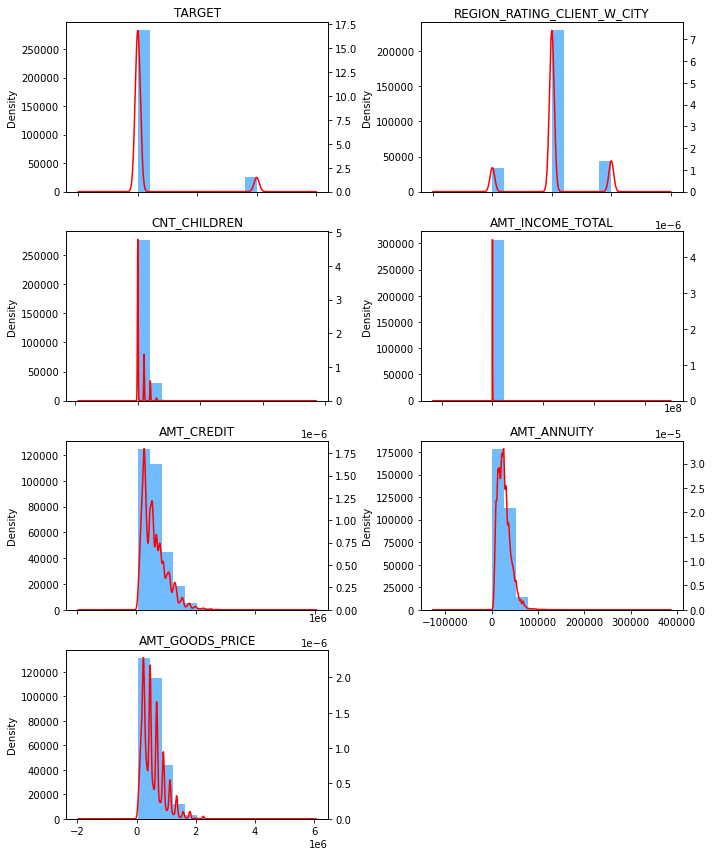

In [17]:
#Distribusi data numerik training sample
data_num = data_numerics[features]
k = len(features)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
plt.delaxes()
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#73bbff')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
plt.show

Text(0.5, 1.0, 'Heatmap Hasil Join')

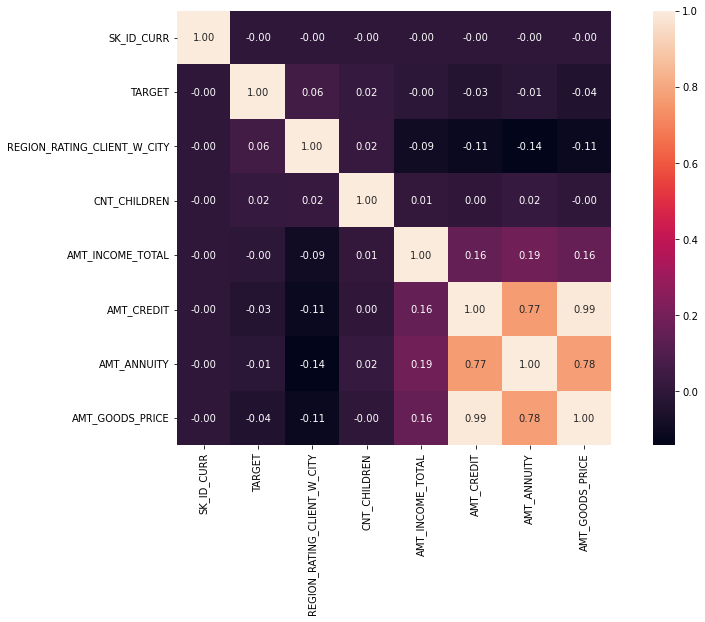

In [18]:
#Korelasi Kolom yang dipilih pada data training
fig = plt.figure(figsize = (15,8))
sns.heatmap(data_train.corr(),annot = True,fmt='.2f',square = True)
ax.set_title('Heatmap Hasil Join')

Berdasarkan heatmap diatas terdapat beberapa kolom yang memiliki nilai korelasi tinggi (>0.7) yaitu AMT_CREDIT, AMT_GOODS_PRICE, dan AMT_ANNUITY. Hal tersebut mengindikasikan adanya multikolinearitas antar kolom-kolom tsb, sehingga dipilih satu kolom saja yaitu AMT_CREDIT.

In [19]:
data_train.drop(['AMT_GOODS_PRICE', 'AMT_ANNUITY'], axis =1, inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
dtyp

#Persebaran unique value data kategorikal

In [20]:
data_cat = data_train.select_dtypes(include=['object'])
cat_uniq_val = data_cat.nunique().reset_index()
cat_uniq_val.columns = ['columns', 'unique_values']
cat_uniq_val = cat_uniq_val.sort_values('unique_values', ascending=False)
cat_uniq_val

,columns,unique_values
6,NAME_INCOME_TYPE,8
5,NAME_HOUSING_TYPE,6
4,NAME_EDUCATION_TYPE,5
0,CODE_GENDER,2
1,NAME_CONTRACT_TYPE,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2


# Data Cleaning

Missing Values

In [21]:
data_missing_value = data_train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data_train))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
#data_missing_value = data_missing_value[data_missing_value['percentage']>0]

In [22]:
data_missing_value[['missing_value', 'percentage']].any()

missing_value    False
percentage       False
dtype: bool

Tidak ada missing value dalam data_train

Duplicated Values

In [23]:
data_train.duplicated().any()

False

Tidak ada duplicated values

Outlier Detection & Treat

In [24]:
#Penghitungan Outlier
Q1_inc = data_train['AMT_INCOME_TOTAL'].quantile(0.25)
Q3_inc = data_train['AMT_INCOME_TOTAL'].quantile(0.75)
low_limit_inc = Q1_inc - (1.5 * (Q3_inc-Q1_inc))
high_limit_inc = Q3_inc + (1.5 * (Q3_inc-Q1_inc))
outlier_inc_index = data_train[data_train['AMT_INCOME_TOTAL'] > high_limit_inc]
outlier_inc = data_train[data_train['AMT_INCOME_TOTAL'] > high_limit_inc].count() # tidak pakai batas low limit karena -

Q1_cred = data_train['AMT_CREDIT'].quantile(0.25)
Q3_cred = data_train['AMT_CREDIT'].quantile(0.75)
low_limit_cred = Q1_cred - (1.5 * (Q3_cred-Q1_cred))
high_limit_cred = Q3_cred + (1.5 * (Q3_cred-Q1_cred))
outlier_cred = data_train[data_train['AMT_CREDIT'] > high_limit_cred].count()

Q1_child = data_train['CNT_CHILDREN'].quantile(0.25)
Q3_child = data_train['CNT_CHILDREN'].quantile(0.75)
low_limit_child = Q1_child - (1.5 * (Q3_child-Q1_child))
high_limit_child = Q3_child + (1.5 * (Q3_child-Q1_child))
outlier_child = data_train[data_train['CNT_CHILDREN'] > high_limit_child].count()

jumlah_outlier = outlier_inc[0]+outlier_cred[0]+outlier_child[0]
total_data = data_train.count()

print('Outlier Income Total :', outlier_inc[0])
print('Outlier Credit Amount  :', outlier_cred[0])
print('Outlier Children Count :', outlier_child[0])
print('Jumlah Outlier :', jumlah_outlier,'(','{}%'.format((jumlah_outlier/(total_data[0])).round(2)*100),'data)')

Outlier Income Total : 14035
Outlier Credit Amount  : 6562
Outlier Children Count : 4272
Jumlah Outlier : 24869 ( 8.0% data)


#Outlier tidak di drop namun value dari kolom-kolom numerik tsb akan dikategorisasi ulang

# Pengelompokan Ulang Data (Data Numeric menjadi Categorical)

Melalui analisis statistik secara sekilas, ada baiknya mentransformasi data numeric menjadi categorical

Sangat penting untuk feature encoding yang nantinya akan berimbas ke proses modeling

In [25]:
data_train.describe()

,SK_ID_CURR,TARGET,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
count,"307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0"
mean,"278,181.5",0.1,2.0,0.4,"168,797.7","599,028.6"
std,"102,790.1",0.3,0.5,0.7,"237,124.6","402,492.6"
min,"100,002.0",0.0,1.0,0.0,"25,650.0","45,000.0"
25%,"189,146.5",0.0,2.0,0.0,"112,500.0","270,000.0"
50%,"278,203.0",0.0,2.0,0.0,"147,150.0","513,531.0"
75%,"367,143.5",0.0,2.0,1.0,"202,500.0","808,650.0"
max,"456,255.0",1.0,3.0,19.0,"117,000,000.0","4,050,000.0"


In [26]:
#Untuk One Hot Encoding
data_train_cat=data_train.copy()

In [27]:
#Pengelompokan Data Train
income = data_train_cat['AMT_INCOME_TOTAL']
child = data_train_cat['CNT_CHILDREN']
credit = data_train_cat['AMT_CREDIT']

data_train_cat['income_cat'] = income.apply(lambda x: '<100k' if x<100000 else ('100k-250k' if x>=100000 and x<=250000 else ('250k-500k' if x>250000 and x<= 500000 else '>500k')))
data_train_cat['credit_cat'] = income.apply(lambda x: '<100k' if x<100000 else ('100k-500k' if x>=100000 and x<=500000 else ('500k-1mio' if x>500000 and x<= 1000000 else '>1mio')))
data_train_cat['child_cat'] = child.apply(lambda x: 0 if x==0 else (1 if x==1 else (2 if x==2 else '>2')))

In [28]:
data_train_cat.drop(['AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT'], axis = 1, inplace = True)
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   SK_ID_CURR                   307507 non-null  int64 
 1   TARGET                       307507 non-null  int64 
 2   CODE_GENDER                  307507 non-null  object
 3   NAME_CONTRACT_TYPE           307507 non-null  object
 4   FLAG_OWN_CAR                 307507 non-null  object
 5   FLAG_OWN_REALTY              307507 non-null  object
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64 
 7   NAME_EDUCATION_TYPE          307507 non-null  object
 8   NAME_HOUSING_TYPE            307507 non-null  object
 9   NAME_INCOME_TYPE             307507 non-null  object
 10  income_cat                   307507 non-null  object
 11  credit_cat                   307507 non-null  object
 12  child_cat                    307507 non-null  object
dtypes: int64(3), o

# Feature Encoding (One Hot Encoding)

In [29]:
#Encode Train
encode_train = pd.get_dummies(data_train_cat, columns = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE','NAME_INCOME_TYPE','income_cat', 'credit_cat', 'child_cat'])

encode_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   SK_ID_CURR                                         307507 non-null  int64
 1   TARGET                                             307507 non-null  int64
 2   CODE_GENDER_F                                      307507 non-null  uint8
 3   CODE_GENDER_M                                      307507 non-null  uint8
 4   NAME_CONTRACT_TYPE_Cash loans                      307507 non-null  uint8
 5   NAME_CONTRACT_TYPE_Revolving loans                 307507 non-null  uint8
 6   FLAG_OWN_CAR_N                                     307507 non-null  uint8
 7   FLAG_OWN_CAR_Y                                     307507 non-null  uint8
 8   FLAG_OWN_REALTY_N                                  307507 non-null  uint8
 9   FLAG_OWN_REALTY

# Label Encoding

In [30]:
data_train_feat = data_train.copy()

In [31]:
#Cek Keunikan Data
#running a loop of value_counts of each column to find out unique values
for column in data_train.columns:
    print ("---- %s ---" % column)
    print (data_train[column].value_counts())

---- SK_ID_CURR ---
100303    1
135959    1
156441    1
160539    1
150300    1
         ..
257495    1
234968    1
237017    1
230874    1
100401    1
Name: SK_ID_CURR, Length: 307507, dtype: int64
---- TARGET ---
0    282682
1     24825
Name: TARGET, dtype: int64
---- CODE_GENDER ---
F    202448
M    105059
Name: CODE_GENDER, dtype: int64
---- NAME_CONTRACT_TYPE ---
Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64
---- FLAG_OWN_CAR ---
N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64
---- FLAG_OWN_REALTY ---
Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
---- REGION_RATING_CLIENT_W_CITY ---
2    229481
3     43859
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
---- CNT_CHILDREN ---
0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
---

In [32]:
income = data_train_feat['AMT_INCOME_TOTAL']
child = data_train_feat['CNT_CHILDREN']
credit = data_train_feat['AMT_CREDIT']

data_train_feat['income_cat'] = income.apply(lambda x: 1 if x<100000 else (2 if x>=100000 and x<=250000 else (3 if x>250000 and x<= 500000 else 4)))
data_train_feat['credit_cat'] = income.apply(lambda x: 1 if x<100000 else (2 if x>=100000 and x<=500000 else (3 if x>500000 and x<= 1000000 else 4)))
data_train_feat['child_cat'] = child.apply(lambda x: 0 if x==0 else (1 if x==1 else (2 if x==2 else 3)))
data_train_feat['NAME_INCOME_TYPE'] = data_train_feat['NAME_INCOME_TYPE'].map({'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3,'Unemployed': 4,'Student': 5, 'Businessman':6, 'Maternity leave':7}).astype(int)
data_train_feat['NAME_CONTRACT_TYPE'] = data_train_feat['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1}).astype(int)
data_train_feat['NAME_HOUSING_TYPE'] = data_train_feat['NAME_HOUSING_TYPE'].map({'House / apartment': 0, 'With parents': 1, 'Municipal apartment':2, 'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5}).astype(int)
data_train_feat['NAME_EDUCATION_TYPE'] = data_train_feat['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}).astype(int)
data_train_feat['CODE_GENDER'] = data_train_feat['CODE_GENDER'].map({'F': 0, 'M': 1}).astype(int)
data_train_feat['FLAG_OWN_CAR'] = data_train_feat['FLAG_OWN_CAR'].map({'Y': 0, 'N': 1}).astype(int)
data_train_feat['FLAG_OWN_REALTY'] = data_train_feat['FLAG_OWN_REALTY'].map({'Y': 0, 'N': 1}).astype(int)

In [33]:
data_train_feat.drop(['AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT'], axis = 1, inplace = True)
data_train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   SK_ID_CURR                   307507 non-null  int64
 1   TARGET                       307507 non-null  int64
 2   CODE_GENDER                  307507 non-null  int32
 3   NAME_CONTRACT_TYPE           307507 non-null  int32
 4   FLAG_OWN_CAR                 307507 non-null  int32
 5   FLAG_OWN_REALTY              307507 non-null  int32
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64
 7   NAME_EDUCATION_TYPE          307507 non-null  int32
 8   NAME_HOUSING_TYPE            307507 non-null  int32
 9   NAME_INCOME_TYPE             307507 non-null  int32
 10  income_cat                   307507 non-null  int64
 11  credit_cat                   307507 non-null  int64
 12  child_cat                    307507 non-null  int64
dtypes: int32(7), int64(6)
memory 

# Dataset Combination

Data historis debitur (data pinjaman sebelumnya) adalah salah satu pertimbangan kuat dalam penerimaan kredit. Selain itu, data historis akan sangat membantu dalam penggalian insight pada data training sample.

# Data Training Sample & Data Biro Kredit

Kali ini dilakukan join pada data training dengan data dari biro kredit.

In [34]:
#Data Historis Biro Kredit (bureau.csv)
df_bureau = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/bureau.csv')

In [35]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [36]:
#Kolom yang dipilih dalam dataset bureau.csv

bur_col = df_bureau[['SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_DEBT','CNT_CREDIT_PROLONG']]

In [37]:
#Data Status Keberjalanan Kredit (bureau_balance.csv)
df_burbal = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/bureau_balance.csv')

Cukup penting untuk melihat status keberjalanan kredit sebelumnya, sehingga dilakukan join antara data bureau dengan bureau_balance

In [38]:
#Diambil status yang paling sering muncul dari setiap SK_ID_BUREAU

aggregations = {'STATUS':'max'}
uniq_burbal = df_burbal.groupby(['SK_ID_BUREAU']).agg(aggregations)
uniq_burbal

,STATUS
SK_ID_BUREAU,
5001709,X
5001710,X
5001711,X
5001712,C
5001713,X
...,...
6842884,X
6842885,5
6842886,C


In [39]:
#JOIN BUREAU
bur_join = bur_col.merge(uniq_burbal,
               left_on = ['SK_ID_BUREAU'],
               right_on = ['SK_ID_BUREAU'],
               how = 'inner')
bur_join

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG,STATUS
0,380361,5715448,Active,0,0.0,0,X
1,380361,5715449,Active,0,0.0,0,X
2,380361,5715451,Closed,0,0.0,0,X
3,380361,5715452,Closed,0,0.0,0,X
4,380361,5715453,Closed,0,0.0,0,X
...,...,...,...,...,...,...,...
774349,229054,5053730,Active,0,"63,530.5",0,X
774350,254479,5053734,Active,0,nan,0,C
774351,363575,5053740,Closed,0,0.0,0,X
774352,245498,5053747,Closed,0,0.0,0,C


In [40]:
#Join data bureau dan data training
train_join = data_train.merge(bur_join.drop_duplicates(subset=['SK_ID_CURR']),
               left_on = ['SK_ID_CURR'],
               right_on = ['SK_ID_CURR'],
               how = 'left')
train_join.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG,STATUS
0,100002,1,M,Cash loans,N,Y,2,0,"202,500.0","406,597.5",Secondary / secondary special,House / apartment,Working,"6,158,904.0",Closed,0.0,nan,0.0,X
1,100003,0,F,Cash loans,N,N,1,0,"270,000.0","1,293,502.5",Higher education,House / apartment,State servant,nan,NaN,nan,nan,nan,NaN
2,100004,0,M,Revolving loans,Y,Y,2,0,"67,500.0","135,000.0",Secondary / secondary special,House / apartment,Working,nan,NaN,nan,nan,nan,NaN
3,100006,0,F,Cash loans,N,Y,2,0,"135,000.0","312,682.5",Secondary / secondary special,House / apartment,Working,nan,NaN,nan,nan,nan,NaN
4,100007,0,M,Cash loans,N,Y,2,0,"121,500.0","513,000.0",Secondary / secondary special,House / apartment,Working,nan,NaN,nan,nan,nan,NaN


In [41]:
train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [42]:
train_join.describe()

,SK_ID_CURR,TARGET,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG
count,"307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","92,231.0","92,231.0","84,696.0","92,231.0"
mean,"278,181.5",0.1,2.0,0.4,"168,797.7","599,028.6","5,961,471.8",1.1,"124,452.4",0.0
std,"102,790.1",0.3,0.5,0.7,"237,124.6","402,492.6","517,606.0",44.4,"899,596.5",0.1
min,"100,002.0",0.0,1.0,0.0,"25,650.0","45,000.0","5,008,804.0",0.0,"-152,983.0",0.0
25%,"189,146.5",0.0,2.0,0.0,"112,500.0","270,000.0","5,564,254.5",0.0,0.0,0.0
50%,"278,203.0",0.0,2.0,0.0,"147,150.0","513,531.0","6,021,536.0",0.0,0.0,0.0
75%,"367,143.5",0.0,2.0,1.0,"202,500.0","808,650.0","6,372,377.5",0.0,0.0,0.0
max,"456,255.0",1.0,3.0,19.0,"117,000,000.0","4,050,000.0","6,842,878.0","2,792.0","164,032,200.0",6.0


In [43]:
train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [44]:
train_join.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
CODE_GENDER                         0
NAME_CONTRACT_TYPE                  0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
REGION_RATING_CLIENT_W_CITY         0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
NAME_EDUCATION_TYPE                 0
NAME_HOUSING_TYPE                   0
NAME_INCOME_TYPE                    0
SK_ID_BUREAU                   215276
CREDIT_ACTIVE                  215276
CREDIT_DAY_OVERDUE             215276
AMT_CREDIT_SUM_DEBT            222811
CNT_CREDIT_PROLONG             215276
STATUS                         215276
dtype: int64

In [141]:
data_missing_value = train_join.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(train_join))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]

<function matplotlib.pyplot.show(*args, **kw)>

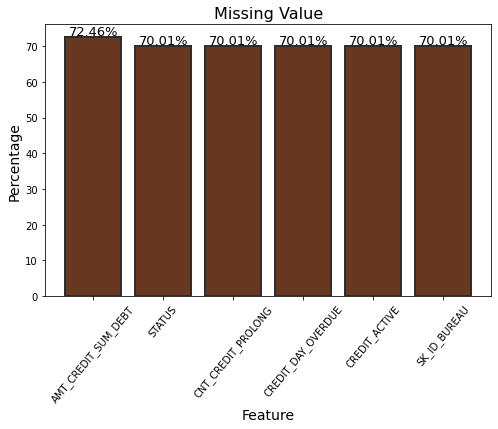

In [46]:
#Visualisasi Missing Value Data Join

x = data_missing_value['feature']
y = data_missing_value['percentage']
plt.figure(figsize=(8,5))
barh = plt.bar(x=x, height=y, data=data_missing_value, 
       color = '#683720', 
       edgecolor= '#2e2e2e',
       linewidth = 2) 

plt.title('Missing Value', fontsize = 16)
plt.xticks(rotation=50)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Feature', fontsize=14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.35,y = y[i]+0.6,s = str(round(y[i],2))+'%',size = 13)
    
#plt.tight_layout
plt.show

Ternyata terdapat sekitar hampir 70% Missing Value pada data join antara data train dengan data historis biro kredit, 
yang berarti hanya 30% debitur pada data training yang sebelumnya pernah melakukan pinjaman yang terdata pada Biro Kredit. Karena dirasa kurang relevan, maka data historis biro kredit tidak jadi digunakan.

#Data Training dengan Historis Kredit Home Credit

In [47]:
#Data Kredit Sebelumnya di Home Credit Indonesia
df_prev = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/previous_application.csv')
df_pos = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/POS_CASH_balance.csv')

Data Previous Application

(Pada dataset diambil kolom NAME_YIELD_GROUP untuk melihat jenis interest dari pinjaman-pinjaman debitur sebelumnya)

In [48]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [49]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.4","17,145.0","17,145.0",0.0,"17,145.0",SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,"365,243.0",-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,"25,188.6","607,500.0","679,671.0",nan,"607,500.0",THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,"365,243.0",-134.0,916.0,"365,243.0","365,243.0",1.0
2,2523466,122040,Cash loans,"15,060.7","112,500.0","136,444.5",nan,"112,500.0",TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,"365,243.0",-271.0,59.0,"365,243.0","365,243.0",1.0
3,2819243,176158,Cash loans,"47,041.3","450,000.0","470,790.0",nan,"450,000.0",MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,"365,243.0",-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,"31,924.4","337,500.0","404,055.0",nan,"337,500.0",THURSDAY,9,...,XNA,24.0,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [50]:
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [51]:
#Fitur yang diambil dari dataset previous application
prev_selected = df_prev[['SK_ID_CURR','SK_ID_PREV', 'NAME_YIELD_GROUP']]

In [52]:
prev_selected.nunique()

SK_ID_CURR           338857
SK_ID_PREV          1670214
NAME_YIELD_GROUP          5
dtype: int64

In [53]:
prev_selected.describe()

,SK_ID_CURR,SK_ID_PREV
count,"1,670,214.0","1,670,214.0"
mean,"278,357.2","1,923,089.1"
std,"102,814.8","532,598.0"
min,"100,001.0","1,000,001.0"
25%,"189,329.0","1,461,857.2"
50%,"278,714.5","1,923,110.5"
75%,"367,514.0","2,384,279.8"
max,"456,255.0","2,845,382.0"


In [54]:
#Pemilihan kolom data pos_cash untuk join
pos_selected = df_pos[['SK_ID_CURR','SK_ID_PREV','CNT_INSTALMENT_FUTURE', 'SK_DPD']]

In [55]:
pos_selected.describe()

,SK_ID_CURR,SK_ID_PREV,CNT_INSTALMENT_FUTURE,SK_DPD
count,"10,001,358.0","10,001,358.0","9,975,271.0","10,001,358.0"
mean,"278,403.9","1,903,216.6",10.5,11.6
std,"102,763.7","535,846.5",11.1,132.7
min,"100,001.0","1,000,001.0",0.0,0.0
25%,"189,550.0","1,434,405.0",3.0,0.0
50%,"278,654.0","1,896,565.0",7.0,0.0
75%,"367,429.0","2,368,963.0",14.0,0.0
max,"456,255.0","2,843,499.0",85.0,"4,231.0"


In [56]:
pos_selected.isnull().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
CNT_INSTALMENT_FUTURE    26087
SK_DPD                       0
dtype: int64

Data POS_CASH Balance

(Pada dataset tsb diambil kolom CNT_INSTALMENT_FUTURE dan SK_DPD untuk melihat banyak angsuran berikutnya serta jatuh tempo yang terlewat dari pinjaman sebelumnya)

In [57]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [58]:
df_pos.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,"10,001,358.0","10,001,358.0","10,001,358.0","9,975,287.0","9,975,271.0","10,001,358.0","10,001,358.0"
mean,"1,903,216.6","278,403.9",-35.0,17.1,10.5,11.6,0.7
std,"535,846.5","102,763.7",26.1,12.0,11.1,132.7,32.8
min,"1,000,001.0","100,001.0",-96.0,1.0,0.0,0.0,0.0
25%,"1,434,405.0","189,550.0",-54.0,10.0,3.0,0.0,0.0
50%,"1,896,565.0","278,654.0",-28.0,12.0,7.0,0.0,0.0
75%,"2,368,963.0","367,429.0",-13.0,24.0,14.0,0.0,0.0
max,"2,843,499.0","456,255.0",-1.0,92.0,85.0,"4,231.0","3,595.0"


Merge data train dengan data prev_selected

In [59]:
train_prev_join = data_train.merge(prev_selected.drop_duplicates(subset=['SK_ID_CURR']),
               left_on = ['SK_ID_CURR'],
               right_on = ['SK_ID_CURR'],
               how = 'left')

In [60]:
train_prev_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [61]:
train_prev_join.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
REGION_RATING_CLIENT_W_CITY        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
NAME_EDUCATION_TYPE                0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
SK_ID_PREV                     16454
NAME_YIELD_GROUP               16454
dtype: int64

In [62]:
data_missing_value = train_prev_join.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(train_prev_join))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]

<function matplotlib.pyplot.show(*args, **kw)>

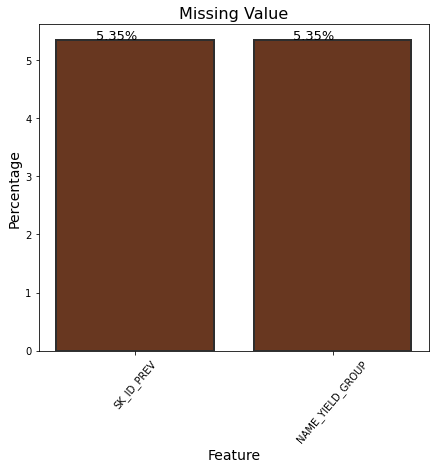

In [63]:
#Visualisasi Missing Value Data Join

x = data_missing_value['feature']
y = data_missing_value['percentage']
plt.figure(figsize=(7,6))
barh = plt.bar(x=x, height=y, data=data_missing_value, 
       color = '#683720', 
       edgecolor= '#2e2e2e',
       linewidth = 2) 

plt.title('Missing Value', fontsize = 16)
plt.xticks(rotation=50)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Feature', fontsize=14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.2,y = y[i]+0.02,s = str(round(y[i],2))+'%',size = 13)
    
#plt.tight_layout
plt.show

Visualisasi missing values hasil merge antara training sample dengan dataset previous selection menunjukkan bahwa terdapat 5,35% ID data training sample Home Credit yang belum pernah melakukan pinjaman di Home Credit.

In [64]:
train_prev_join = train_prev_join.fillna(0)
train_prev_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

Merge Data Train dengan Data POS_CAS

In [65]:
#Merge data_train dengan pos_selected
train_pos_join = data_train.merge(pos_selected.drop_duplicates(subset=['SK_ID_CURR']),
               left_on = ['SK_ID_CURR'],
               right_on = ['SK_ID_CURR'],
               how = 'left')

In [66]:
train_pos_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [67]:
data_missing_value = train_pos_join.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(train_pos_join))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,CNT_INSTALMENT_FUTURE,19313,6.3
1,SK_ID_PREV,18067,5.9
2,SK_DPD,18067,5.9


<function matplotlib.pyplot.show(*args, **kw)>

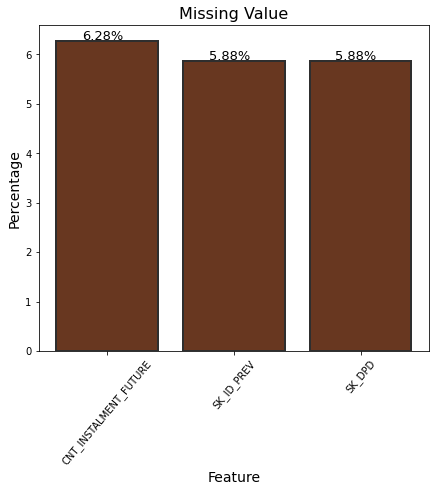

In [68]:
#Visualisasi Missing Value Data train_pos_join

x = data_missing_value['feature']
y = data_missing_value['percentage']
plt.figure(figsize=(7,6))
barh = plt.bar(x=x, height=y, data=data_missing_value, 
       color = '#683720', 
       edgecolor= '#2e2e2e',
       linewidth = 2) 

plt.title('Missing Value', fontsize = 16)
plt.xticks(rotation=50)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Feature', fontsize=14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.2,y = y[i]+0.02,s = str(round(y[i],2))+'%',size = 13)
    
#plt.tight_layout
plt.show

Terdapat 5,88% missing value dari hasil join data training dengan data POS_CASH_Balance. Hal ini menandakan terdapat 5,88% debitur baru (yang belum pernah melakukan transaksi sebelumnya/transaksi sebelumnya tidak terekam).

In [69]:
train_pos_join = train_pos_join.fillna(0)
train_pos_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307506
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   NAME_CONTRACT_TYPE           307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   REGION_RATING_CLIENT_W_CITY  307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  int64  
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_HOUSING_TYPE            307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [70]:
train_pos_join.describe()

,SK_ID_CURR,TARGET,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,SK_ID_PREV,CNT_INSTALMENT_FUTURE,SK_DPD
count,"307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0","307,507.0"
mean,"278,181.5",0.1,2.0,0.4,"168,797.7","599,028.6","1,791,061.7",9.8,0.6
std,"102,790.1",0.3,0.5,0.7,"237,124.6","402,492.6","685,370.5",11.0,23.7
min,"100,002.0",0.0,1.0,0.0,"25,650.0","45,000.0",0.0,0.0,0.0
25%,"189,146.5",0.0,2.0,0.0,"112,500.0","270,000.0","1,356,344.0",2.0,0.0
50%,"278,203.0",0.0,2.0,0.0,"147,150.0","513,531.0","1,837,181.0",7.0,0.0
75%,"367,143.5",0.0,2.0,1.0,"202,500.0","808,650.0","2,334,784.5",12.0,0.0
max,"456,255.0",1.0,3.0,19.0,"117,000,000.0","4,050,000.0","2,843,492.0",72.0,"3,227.0"


# C. DATA VISUALIZATION

Untuk data visualization, digunakan data training sample, data hasil merge antara training sample dengan dataset previous_application serta data hasil merge training sample dengan data POS_CASH_balance

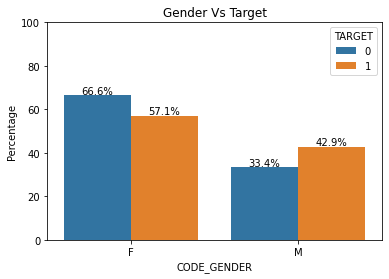

In [71]:
#GENDER VS TARGET
gender_counts = (data_train.groupby(['TARGET'])['CODE_GENDER']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('CODE_GENDER')
                .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='CODE_GENDER', y='Percentage', hue='TARGET', data=gender_counts)
p.set_ylim(0,100)
p.set_title('Gender Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=0)

for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.1, txt_y+0.5, txt)

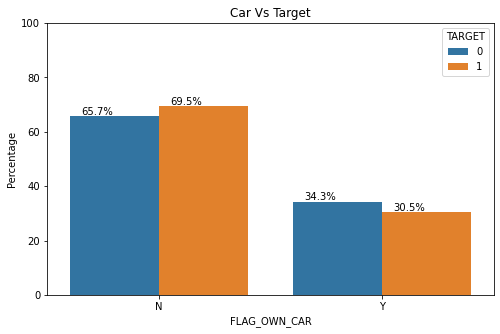

In [72]:
#OWN CAR vs TARGET
car_counts = (data_train.groupby(['TARGET'])['FLAG_OWN_CAR']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('FLAG_OWN_CAR')
                .sort_values(['Percentage'],ascending=False))
plt.figure(figsize=(8,5))
p = sns.barplot(x='FLAG_OWN_CAR', y='Percentage', hue='TARGET', data=car_counts)
p.set_ylim(0,100)
p.set_title('Car Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=0)

for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.05, txt_y+0.5, txt)
#    plt.text(x = x_numbers[i]-0.1,y = y[i]+0.1,s = str(round(y[i],2))+'%',size = 14)

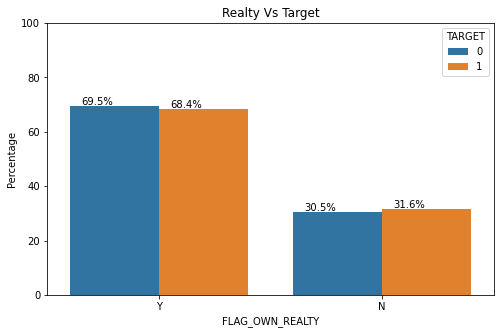

In [73]:
#OWN REALTY vs TARGET
realty_counts = (data_train.groupby(['TARGET'])['FLAG_OWN_REALTY']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('FLAG_OWN_REALTY')
                .sort_values(['Percentage'],ascending=False))
plt.figure(figsize=(8,5))
p = sns.barplot(x='FLAG_OWN_REALTY', y='Percentage', hue='TARGET', data=realty_counts)
p.set_ylim(0,100)
p.set_title('Realty Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=0)

for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.05, txt_y+0.5, txt)

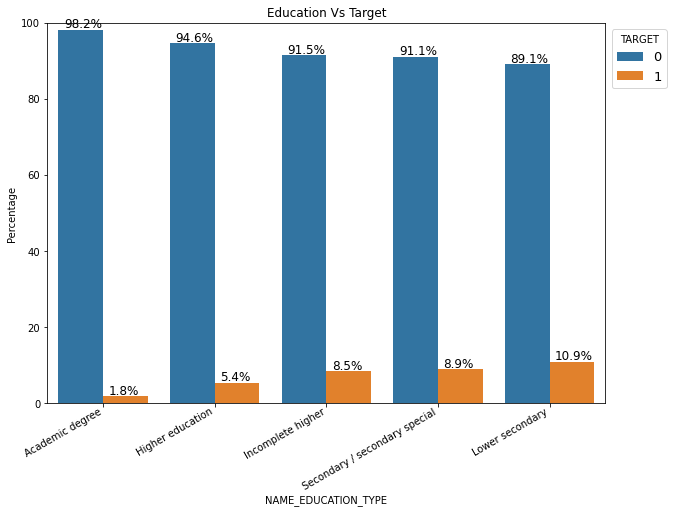

In [74]:
#EDUCATION VS TARGET
fig = plt.figure(figsize = (10,7))
education_counts = (data_train.groupby(['NAME_EDUCATION_TYPE'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('NAME_EDUCATION_TYPE')
                .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='NAME_EDUCATION_TYPE', y='Percentage', hue='TARGET', data=education_counts)
p.set_ylim(0,100)
p.set_title('Education Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=30, va='center_baseline', ha='right')
p.legend(loc='best', bbox_to_anchor=(1.0, 1.0),title = 'TARGET',fontsize=13)
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.05, txt_y+0.5, txt,fontsize=12)

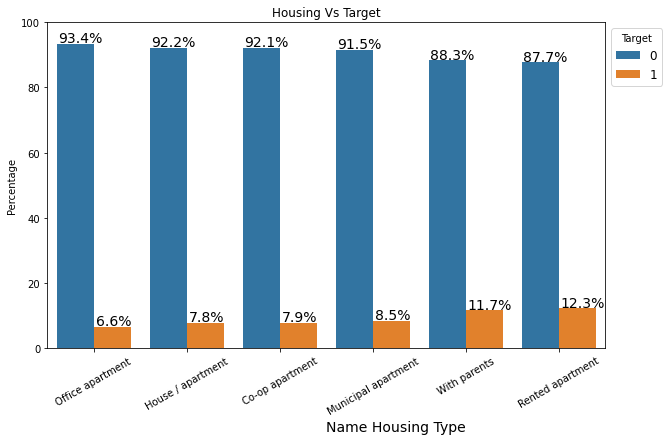

In [75]:
#HOUSING VS TARGET
fig = plt.figure(figsize = (10,6))
housing_counts = (data_train.groupby(['NAME_HOUSING_TYPE'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('NAME_HOUSING_TYPE')
                 .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='NAME_HOUSING_TYPE', y='Percentage', hue='TARGET', data=housing_counts)
p.set_ylim(0,100)
p.set_title('Housing Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=30)
plt.xlabel('Name Housing Type',fontsize=14, ha='left')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0),title='Target',fontsize=12)
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.02, txt_y+0.5, txt, fontsize=14)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


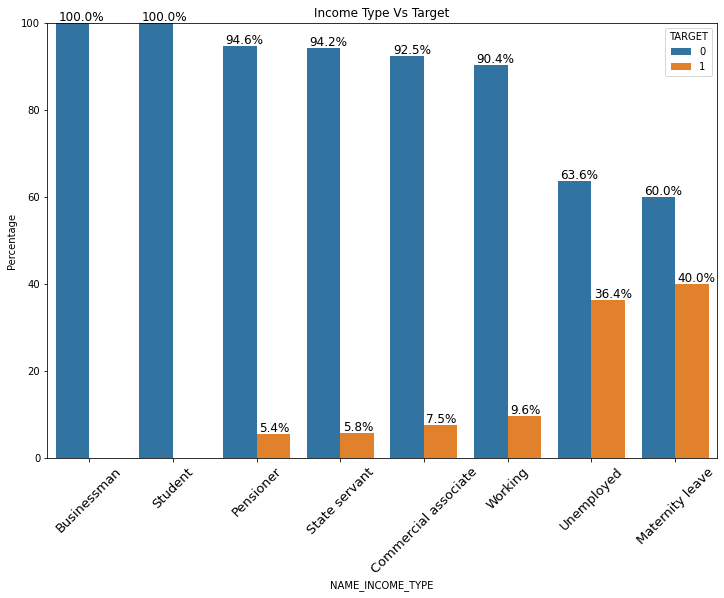

In [76]:
#INCOME TYPE VS TARGET
fig = plt.figure(figsize = (12,8))
income_typ_counts = (data_train.groupby(['NAME_INCOME_TYPE'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('NAME_INCOME_TYPE')
                .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='NAME_INCOME_TYPE', y='Percentage', hue='TARGET', data=income_typ_counts)
p.set_ylim(0,100)
p.set_title('Income Type Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=45, fontsize=13)
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.03, txt_y+0.5, txt, fontsize=12)

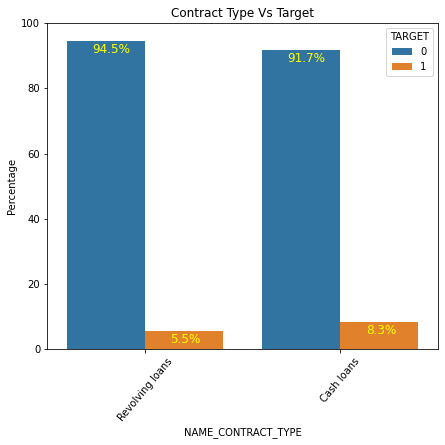

In [77]:
#CONTRACT TYPE VS TARGET
fig = plt.figure(figsize = (7,6))
contract_counts = (data_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('NAME_CONTRACT_TYPE')
                .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='NAME_CONTRACT_TYPE', y='Percentage', hue='TARGET', data=contract_counts)
p.set_ylim(0,100)
p.set_title('Contract Type Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=50)
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.13, txt_y-3.6, txt, fontsize=12, color = 'yellow')

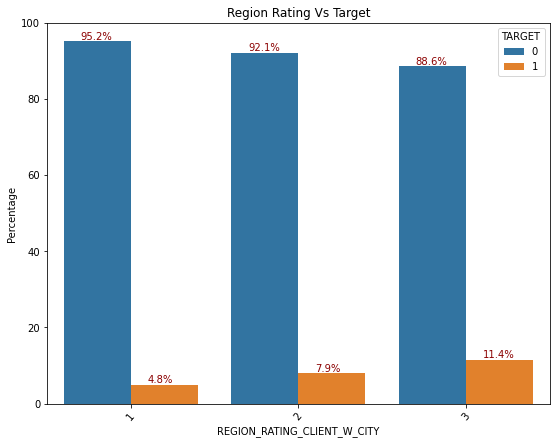

In [78]:
#Region Population VS TARGET
fig = plt.figure(figsize = (9,7))
region_counts = (data_train.groupby(['REGION_RATING_CLIENT_W_CITY'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('REGION_RATING_CLIENT_W_CITY')
                .sort_values(['Percentage'],ascending=False))
p = sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y='Percentage', hue='TARGET', data=region_counts)
p.set_ylim(0,100)
p.set_title('Region Rating Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=50)
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.1, txt_y+0.5, txt, color = 'darkred')

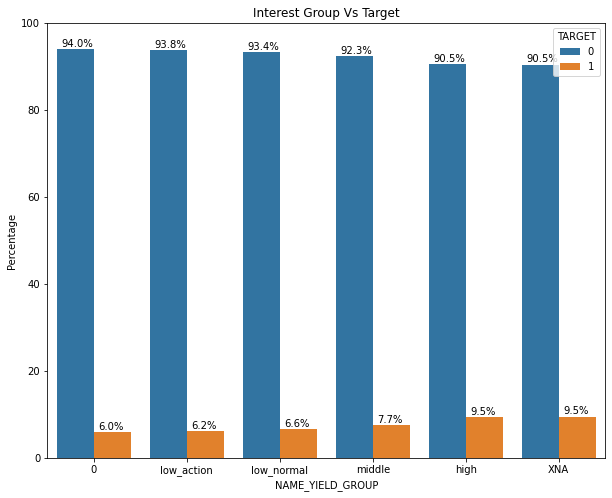

In [79]:
#YIELD_GROUP vs TARGET
yield_counts = (train_prev_join.groupby(['NAME_YIELD_GROUP'])['TARGET']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
#                .sort_values('NAME_YIELD_GROUP'))
                .sort_values(['Percentage'],ascending=False))
plt.figure(figsize=(10,8))
p = sns.barplot(x='NAME_YIELD_GROUP', y='Percentage', hue='TARGET', data=yield_counts)
p.set_ylim(0,100)

p.set_title('Interest Group Vs Target')
_ = plt.setp(p.get_xticklabels(), rotation=0)
#x_numbers = range(len(train_vis['CODE_GENDER']))
for i in p.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x()
    txt_y = i.get_height()
    p.text(txt_x+0.05, txt_y+0.5, txt)
#    plt.text(x = x_numbers[i]-0.1,y = y[i]+0.1,s = str(round(y[i],2))+'%',size = 14)

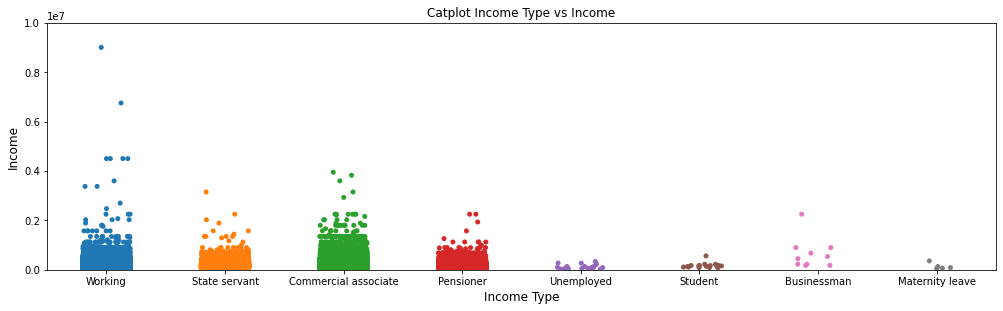

In [80]:
#Persebaran Income Type vs Income
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,2)
sns.stripplot('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', data = data_train, jitter = 0.2);
plt.title('Catplot Income Type vs Income')
plt.xlabel('Income Type',fontsize = 12);
plt.ylabel('Income',fontsize = 12);
plt.ylim(0,10000000);

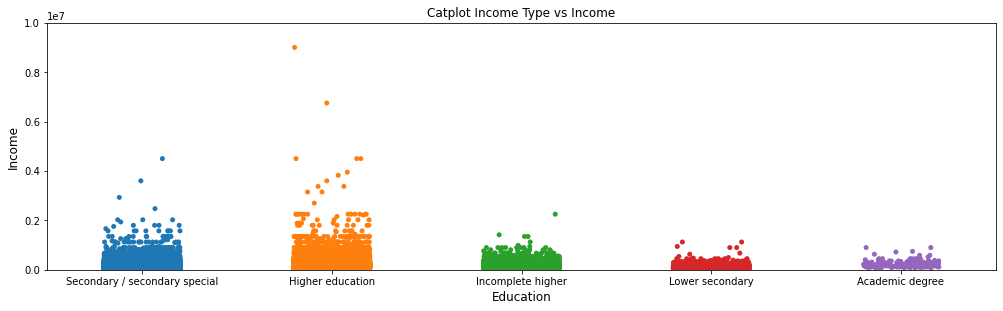

In [81]:
#Persebaran Education vs Income
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,2)
sns.stripplot('NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', data = data_train, jitter = 0.2);
plt.title('Catplot Income Type vs Income')
plt.xlabel('Education',fontsize = 12);
plt.ylabel('Income',fontsize = 12);
plt.ylim(0,10000000);

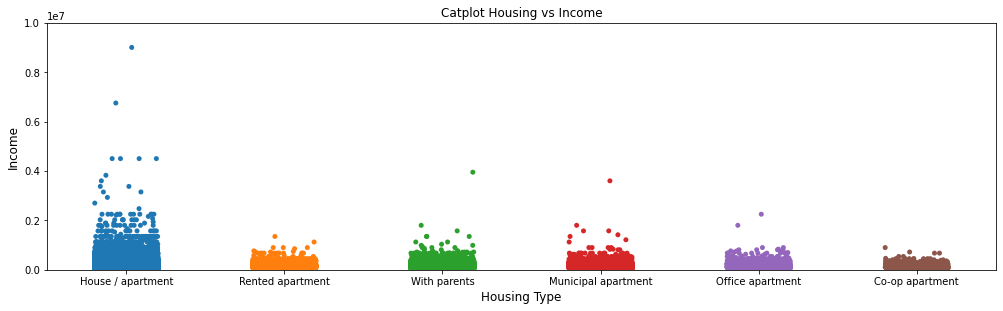

In [82]:
#Catplot Housing vs Income
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,2)
sns.stripplot('NAME_HOUSING_TYPE', 'AMT_INCOME_TOTAL', data = data_train, jitter = 0.2);
plt.title('Catplot Housing vs Income')
plt.xlabel('Housing Type',fontsize = 12);
plt.ylabel('Income',fontsize = 12);
plt.ylim(0,10000000);

<Figure size 1440x1440 with 0 Axes>

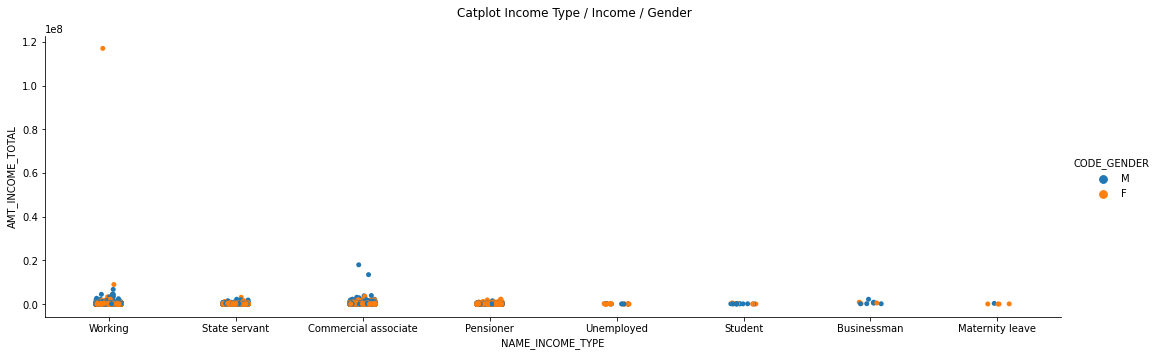

In [83]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_INCOME_TYPE' , y= 'AMT_INCOME_TOTAL',hue = 'CODE_GENDER', data=data_train, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Income Type / Income / Gender')
plt.show()

<Figure size 1440x1440 with 0 Axes>

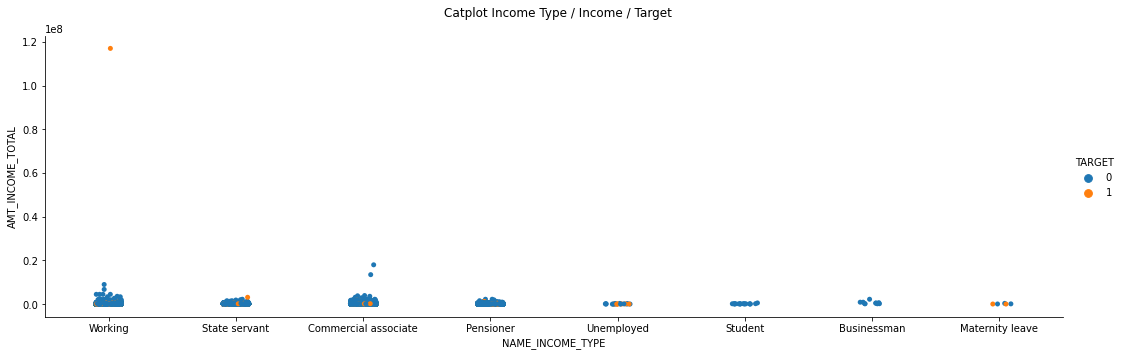

In [84]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_INCOME_TYPE' , y= 'AMT_INCOME_TOTAL',hue = 'TARGET', data=data_train, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Income Type / Income / Target')
plt.show()

<Figure size 1440x1440 with 0 Axes>

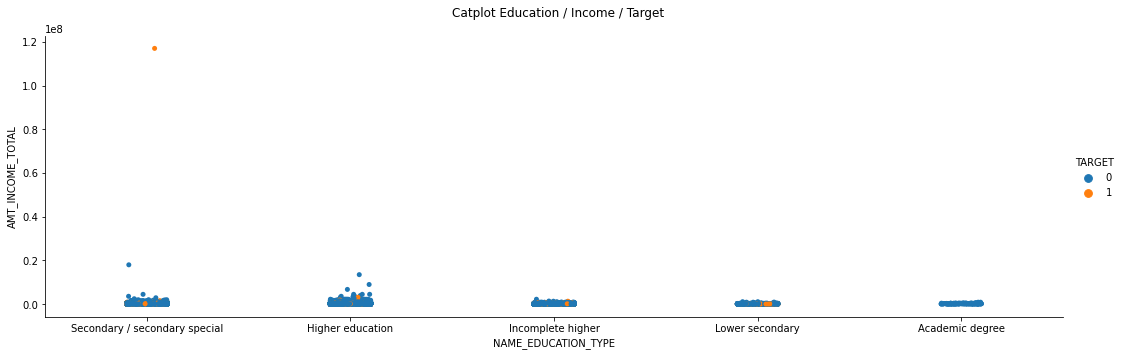

In [85]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_EDUCATION_TYPE' , y= 'AMT_INCOME_TOTAL',hue = 'TARGET', data=data_train, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Education / Income / Target')
plt.show()

<Figure size 1440x1440 with 0 Axes>

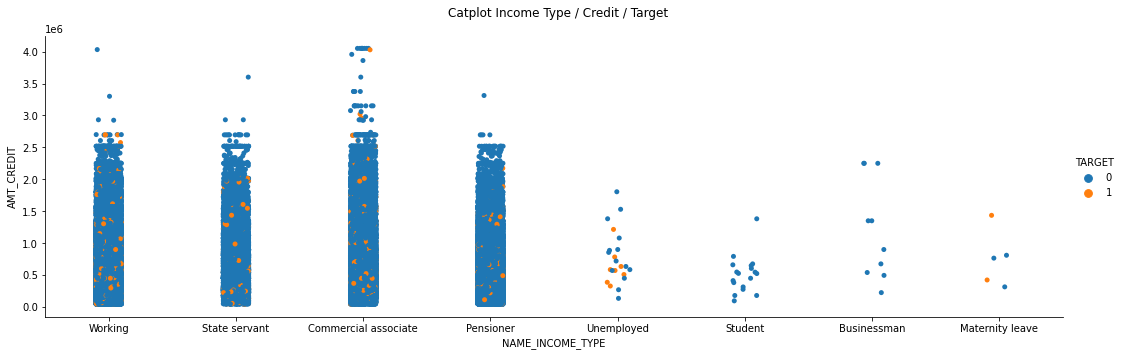

In [86]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_INCOME_TYPE' , y= 'AMT_CREDIT',hue = 'TARGET', data=data_train, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Income Type / Credit / Target')
plt.show()

<Figure size 1440x1440 with 0 Axes>

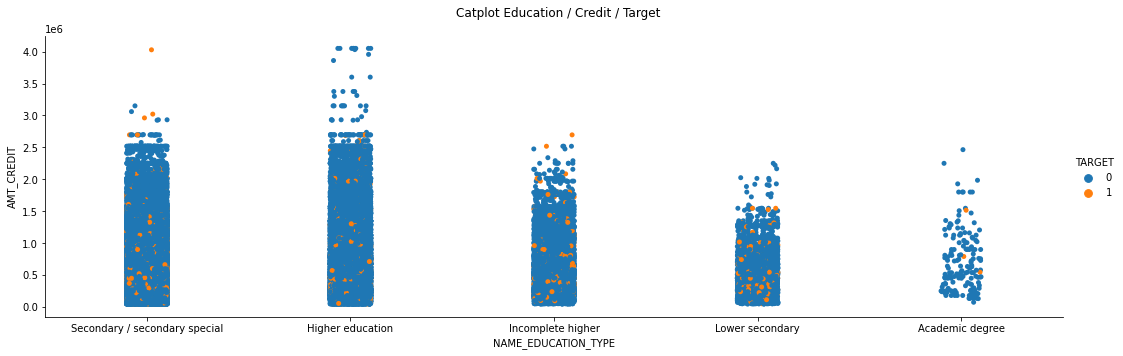

In [87]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_EDUCATION_TYPE' , y= 'AMT_CREDIT',hue = 'TARGET', data=data_train, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Education / Credit / Target')
plt.show()

<Figure size 1440x1440 with 0 Axes>

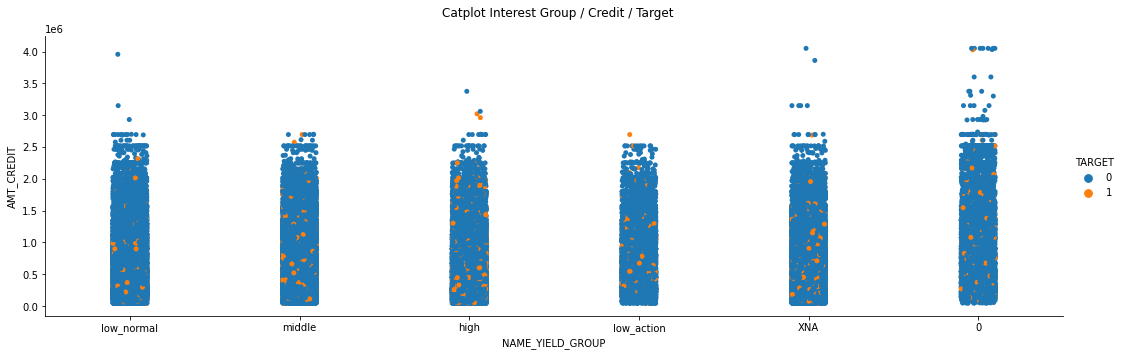

In [88]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='NAME_YIELD_GROUP' , y= 'AMT_CREDIT',hue = 'TARGET', data=train_prev_join, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Interest Group / Credit / Target')
plt.show()

In [89]:
df_total = train_pos_join.groupby(['NAME_INCOME_TYPE','TARGET']).agg({'SK_DPD':['sum']})
df_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('Businessman', 0) to ('Working', 1)
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (SK_DPD, sum)  14 non-null     float64
dtypes: float64(1)
memory usage: 388.0+ bytes


Text(0.5, 1.0, 'Income Type / Mean Day Past Due (DPD) / Target')

<Figure size 1008x576 with 0 Axes>

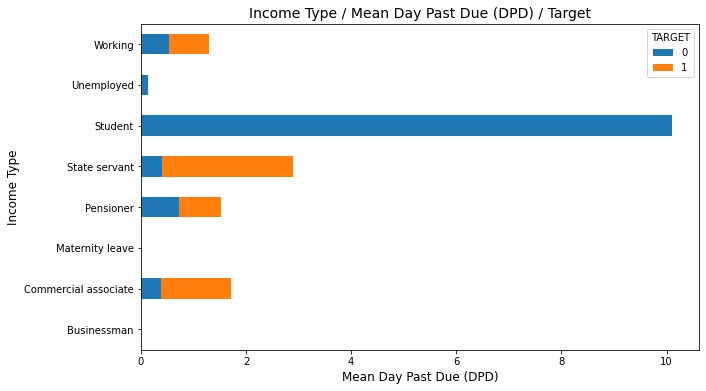

In [90]:
#Perbandingan Income Type terhadap Target Berdasarkan Rerata Hari Lewat Jatuh Tempo (SK_DPD)

dpd_inc = train_pos_join.groupby(['NAME_INCOME_TYPE', 'TARGET'])['SK_DPD']\
.mean().reset_index()
dpd_inc_stack = dpd_inc.pivot_table(index='NAME_INCOME_TYPE',columns='TARGET',
                                    values='SK_DPD')
ax = dpd_inc_stack.plot(kind='barh',stacked=True, fontsize=10,mark_right=True,figsize=(10,6))

dpd_inc_stack_percent = pd.DataFrame(dpd_inc_stack.to_records()).fillna(0)

#dpd_inc_stack_total = dpd_inc_stack_percent['0'] + dpd_inc_stack_percent['1']
#df_rel = dpd_inc_stack_percent[dpd_inc_stack_percent.columns[1:]].div(dpd_inc_stack_total, 0)*100

#for x in df_rel:
#    for i, (cs, ab, pc) in enumerate(zip(dpd_inc_stack_percent.iloc[:, 1:].cumsum(1)[x], 
#                                         dpd_inc_stack_percent[x], df_rel[x])):
#        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
#                 va = 'center', ha = 'center')
#        if pc >= 10:
#            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', fontsize=10, rotation = 45, color='#BA3C0D')
#        if cs==0:
#            plt.text(cs, i, str(np.round(pc, 1)) + '%', va='center', ha='left', fontsize=10, rotation = 45, color='#BA3C0D')

plt.xlabel('Mean Day Past Due (DPD)', fontsize=12);
plt.ylabel('Income Type', fontsize=12);
ax.set_title('Income Type / Mean Day Past Due (DPD) / Target', fontsize =14)

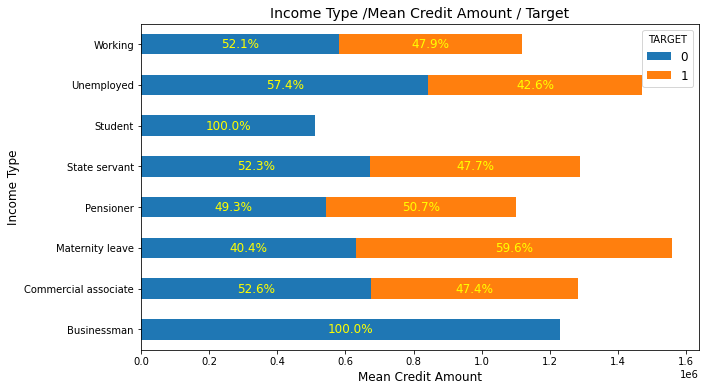

In [91]:
#Perbandingan Income Type terhadap Target Berdasarkan Rerata Jumlah Kredit (AMT_CREDIT) dengan Percentage
credit_inc = data_train.groupby(['NAME_INCOME_TYPE', 'TARGET'])['AMT_CREDIT']\
.mean().reset_index()
credit_inc_stack = credit_inc.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', 
                       values='AMT_CREDIT')
ax = credit_inc_stack.plot(kind='barh',stacked=True, fontsize=10,mark_right=True, figsize=(10,6))
credit_inc_stack_percent = pd.DataFrame(credit_inc_stack.to_records()).fillna(0)
credit_inc_stack_total = credit_inc_stack_percent['0'] + credit_inc_stack_percent['1']
df_rel = credit_inc_stack_percent[credit_inc_stack_percent.columns[1:]].div(credit_inc_stack_total, 0)*100

for x in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(credit_inc_stack_percent.iloc[:, 1:].cumsum(1)[x], 
                                         credit_inc_stack_percent[x], df_rel[x])):
        if pc >= 10:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', fontsize=12, color='yellow')

    
ax.legend(loc='best', bbox_to_anchor=(1.0, 1.0),title = 'TARGET',fontsize=12)
ax.set_title('Income Type /Mean Credit Amount / Target', fontsize =14)
ax.set_xlabel('Mean Credit Amount', fontsize=12);
ax.set_ylabel('Income Type', fontsize=12);

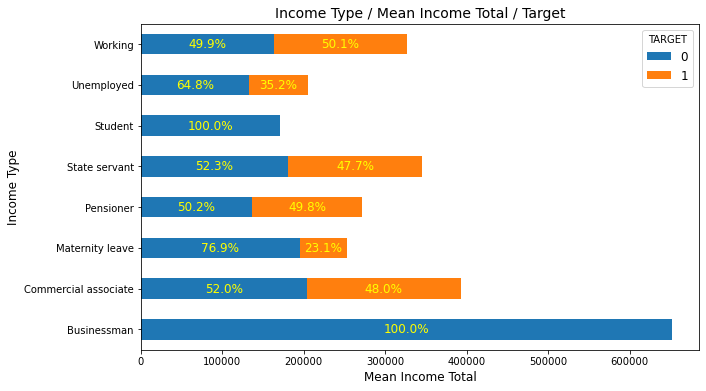

In [92]:
#Perbandingan Income Type terhadap Target Berdasarkan Rerata Jumlah Penghasilan (AMT_INCOME_TOTAL) dengan Percentage (%)
inc_inc = data_train.groupby(['NAME_INCOME_TYPE', 'TARGET'])['AMT_INCOME_TOTAL']\
.mean().reset_index()
inc_inc_stack = inc_inc.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', 
                       values='AMT_INCOME_TOTAL')
ax = inc_inc_stack.plot(kind='barh',stacked=True, fontsize=10,mark_right=True, figsize=(10,6))
inc_inc_stack_percent = pd.DataFrame(inc_inc_stack.to_records()).fillna(0)
inc_inc_stack_total = inc_inc_stack_percent['0'] + inc_inc_stack_percent['1']
df_rel = inc_inc_stack_percent[inc_inc_stack_percent.columns[1:]].div(inc_inc_stack_total, 0)*100

for x in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(inc_inc_stack_percent.iloc[:, 1:].cumsum(1)[x], 
                                         inc_inc_stack_percent[x], df_rel[x])):
        if pc >= 10:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', fontsize=12, color='yellow')
        if cs==0 :
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='left', fontsize=10, rotation = 45, color='maroon')

    
ax.legend(loc='best', bbox_to_anchor=(1.0, 1.0),title = 'TARGET',fontsize=12)
ax.set_title('Income Type / Mean Income Total / Target', fontsize =14)
ax.set_xlabel('Mean Income Total', fontsize=12);
ax.set_ylabel('Income Type', fontsize=12);

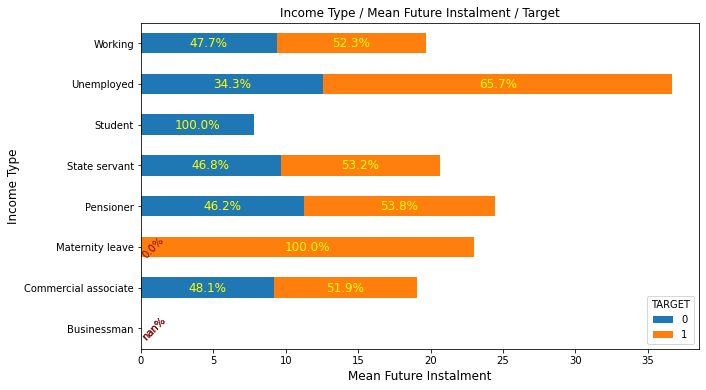

In [93]:
#Perbandingan Income Type terhadap Target Berdasarkan Rerata Future Instalment (CNT_FUTURE) dengan Percentage (%) 
instal_inc = train_pos_join.groupby(['NAME_INCOME_TYPE', 'TARGET'])['CNT_INSTALMENT_FUTURE']\
.mean().reset_index()
instal_inc_stack = instal_inc.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', 
                       values='CNT_INSTALMENT_FUTURE')
ax = instal_inc_stack.plot(kind='barh',stacked=True, figsize=(10,6))
instal_inc_stack_percent = pd.DataFrame(instal_inc_stack.to_records()).fillna(0)
instal_inc_stack_total = instal_inc_stack_percent['0'] + instal_inc_stack_percent['1']
df_rel = instal_inc_stack_percent[instal_inc_stack_percent.columns[1:]].div(instal_inc_stack_total, 0)*100

for x in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(instal_inc_stack_percent.iloc[:, 1:].cumsum(1)[x], 
                                         instal_inc_stack_percent[x], df_rel[x])):
        if pc >= 10 and cs!=0:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', fontsize=12, color='yellow')
        if cs==0 :
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='left', fontsize=10, rotation = 45, color='maroon')

ax.set_title('Income Type / Mean Future Instalment / Target')
ax.set_xlabel('Mean Future Instalment', fontsize=12);
ax.set_ylabel('Income Type', fontsize=12);

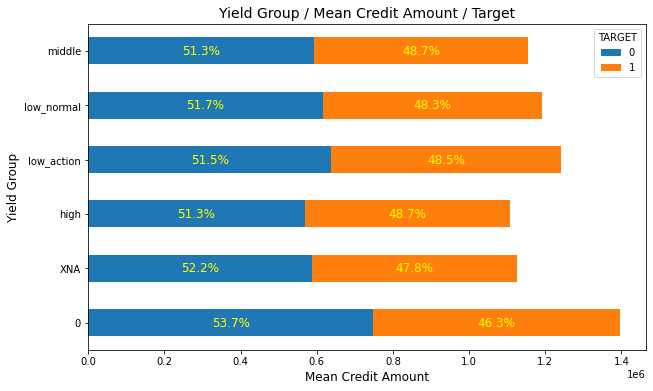

In [94]:
#Perbandingan Yield Group terhadap Target Berdasarkan Rerata Credit Amount dengan Percentage (%)
credit_yield = train_prev_join.groupby(['NAME_YIELD_GROUP', 'TARGET'])['AMT_CREDIT']\
.mean().reset_index()
credit_yield_stack = credit_yield.pivot_table(index='NAME_YIELD_GROUP', columns='TARGET', 
                       values='AMT_CREDIT')
ax = credit_yield_stack.plot(kind='barh',stacked=True, figsize=(10,6))
credit_yield_stack_percent = pd.DataFrame(credit_yield_stack.to_records()).fillna(0)
credit_yield_stack_total = credit_yield_stack_percent['0'] + credit_yield_stack_percent['1']
df_rel = credit_yield_stack_percent[credit_yield_stack_percent.columns[1:]].div(credit_yield_stack_total, 0)*100

for x in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(credit_yield_stack_percent.iloc[:, 1:].cumsum(1)[x], 
                                         credit_yield_stack_percent[x], df_rel[x])):
        if pc >= 10:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', fontsize=12, color='yellow')


ax.set_title('Yield Group / Mean Credit Amount / Target', fontsize=14)
ax.set_xlabel('Mean Credit Amount', fontsize=12);
ax.set_ylabel('Yield Group', fontsize=12);

<function matplotlib.pyplot.show(*args, **kw)>

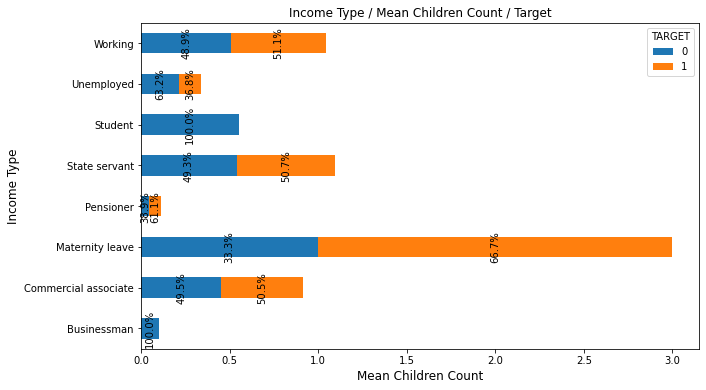

In [95]:
#Perbandingan Income Type terhadap Target Berdasarkan Rerata Jumlah Anak
%matplotlib inline
child_inc = data_train.groupby(['NAME_INCOME_TYPE', 'TARGET'])['CNT_CHILDREN']\
.mean().reset_index()
child_inc_stack = child_inc.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', 
                       values='CNT_CHILDREN')
ax = child_inc_stack.plot(kind='barh',stacked=True, figsize=(10,6))

child_inc_stack_percent = pd.DataFrame(child_inc_stack.to_records()).fillna(0)
child_inc_stack_total = child_inc_stack_percent['0'] + child_inc_stack_percent['1']
df_rel = child_inc_stack_percent[child_inc_stack_percent.columns[1:]].div(child_inc_stack_total, 0)*100

for x in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(child_inc_stack_percent.iloc[:, 1:].cumsum(1)[x], 
                                         child_inc_stack_percent[x], df_rel[x])):
#        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
#                 va = 'center', ha = 'center')
        if pc >= 10:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', rotation=90, fontsize=10, color='black')

ax.set_title('Income Type / Mean Children Count / Target')
ax.set_xlabel('Mean Children Count', fontsize=12);
ax.set_ylabel('Income Type', fontsize=12);
plt.show

# D. Modelling

# Logistic Regression

In [96]:
#Data train & data set
x_reg = encode_train.drop(['SK_ID_CURR','TARGET'], axis=1)
y_reg = encode_train.iloc[:,1]
y_reg

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307507, dtype: int64

In [97]:
#Split Data Train & Data Validation
from sklearn.model_selection import train_test_split 
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(x_reg,
                                                y_reg,
                                                test_size = 0.3,
                                                random_state = 42)

In [98]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_lg, y_train_lg)

LogisticRegression(random_state=42)

In [99]:
y_predicted = logreg.predict(x_test_lg)
y_predicted

from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix') 
print(confusion_matrix(y_test_lg, y_predicted))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test_lg, y_predicted))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test_lg, y_predicted))


Confusion Matrix
[[84811     0]
 [ 7442     0]]

Test Accuracy
0.919330536676314

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84811
           1       0.00      0.00      0.00      7442

    accuracy                           0.92     92253
   macro avg       0.46      0.50      0.48     92253
weighted avg       0.85      0.92      0.88     92253



[Text(0, 0.5, 'TARGET = 0'), Text(0, 1.5, 'TARGET = 1')]

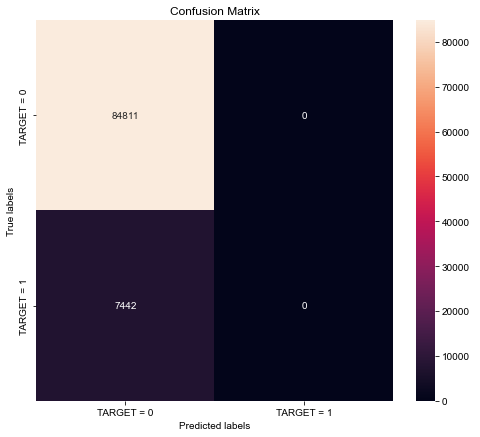

In [100]:
plot_logreg = confusion_matrix(y_test_lg, y_predicted)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(plot_logreg, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])
ax.yaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])

In [101]:
#AUC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_lg, y_predicted, pos_label = 1)
print('AUC Score :',auc(fpr,tpr))
print('ROC AUC Score :', roc_auc_score(fpr,tpr))

AUC Score : 0.5
ROC AUC Score : 1.0


#Hyperparameter Tuning

In [102]:
param_grid = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty": ['l1', 'l2'],
    "C": [100, 10, 1.0, 0.1, 0.01]
}

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(logreg, param_grid, scoring = 'accuracy', n_jobs = -1, cv=3)

_ = grid_cv.fit(x_reg, y_reg)

print('Best_score :',grid_cv.best_score_)
print('Best_params :',grid_cv.best_params_)

Best_score : 0.9192701304343477
Best_params : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [103]:
logreg2 = LogisticRegression(penalty='l2', C=10, solver='lbfgs', random_state=40)
logreg2.fit(x_train_lg, y_train_lg)

LogisticRegression(C=10, random_state=40)

In [104]:
y_predicted2 = logreg2.predict(x_test_lg)
y_predicted2

from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix') # generate the confusion matrix
print(confusion_matrix(y_test_lg, y_predicted2))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test_lg, y_predicted2))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test_lg, y_predicted2))


Confusion Matrix
[[84811     0]
 [ 7442     0]]

Test Accuracy
0.919330536676314

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84811
           1       0.00      0.00      0.00      7442

    accuracy                           0.92     92253
   macro avg       0.46      0.50      0.48     92253
weighted avg       0.85      0.92      0.88     92253



In [105]:
#AUC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test_lg, y_predicted2, pos_label = 1)
print('AUC Score :',auc(fpr,tpr))
print('ROC AUC Score :', roc_auc_score(fpr,tpr))
print('Precision Recall Curve :', roc_auc_score(fpr,tpr))
#accuracy_score(fpr,tpr)

AUC Score : 0.5
ROC AUC Score : 1.0
Precision Recall Curve : 1.0


[Text(0, 0.5, 'TARGET = 0'), Text(0, 1.5, 'TARGET = 1')]

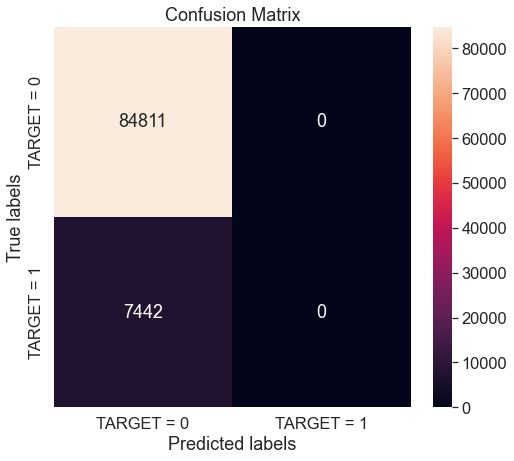

In [106]:
plot_logreg2 = confusion_matrix(y_test_lg, y_predicted2)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(plot_logreg2, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])
ax.yaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])

# Decision Tree

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [108]:
x_dectree = encode_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_dectree = encode_train.iloc[:,1]
y_dectree

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307507, dtype: int64

In [109]:
x_trainDT, x_testDT, y_trainDT, y_testDT = train_test_split(x_dectree,y_dectree, test_size = 1/3 , random_state = 42)

In [110]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(x_trainDT,y_trainDT)

DecisionTreeClassifier()

In [111]:
y_predtree = dectree.predict(x_testDT)
accurtree = accuracy_score(y_testDT, y_predtree)
#print(f'Out-of-bag score estimate: {dectree.oob_score_:.3}')
print(f'Mean accuracy score: {accurtree:.5}')

Mean accuracy score: 0.91746


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix') # generate the confusion matrix
print(confusion_matrix(y_testDT,y_predtree))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_testDT,y_predtree))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_testDT,y_predtree))


Confusion Matrix
[[94007   255]
 [ 8206    35]]

Test Accuracy
0.9174560744563574

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     94262
           1       0.12      0.00      0.01      8241

    accuracy                           0.92    102503
   macro avg       0.52      0.50      0.48    102503
weighted avg       0.86      0.92      0.88    102503



[Text(0, 0.5, 'TARGET = 0'), Text(0, 1.5, 'TARGET = 1')]

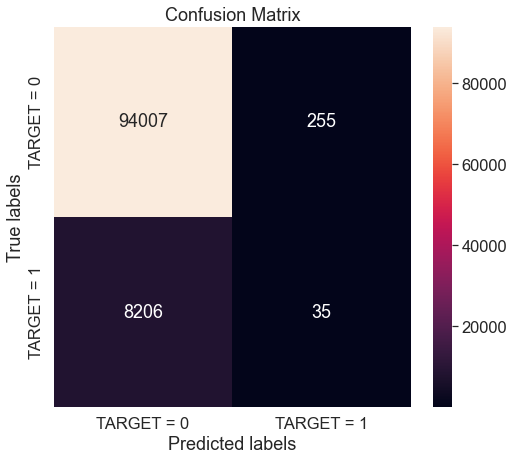

In [113]:
plot_dectree = confusion_matrix(y_testDT, y_predtree)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(plot_dectree, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])
ax.yaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])

In [114]:
fpr, tpr, thresholds = roc_curve(y_testDT, y_predtree, pos_label = 1)
auc(fpr,tpr)

0.5007709157680548

#Hyperparameter Tuning

In [115]:
#Tuning Hyperparameter

param_grid = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10,20],
    "max_leaf_nodes": [1,2,3,4,5,6,7,8,9,10,15,20,30],
 #   "max_leaf_nodes": [None,10,20,30,40,50,60,70,80,90],
    "min_samples_split" : [2,3,4,5,7,8,9,10,15,20,30]
}

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(dectree, param_grid, scoring = 'accuracy', n_jobs =-1, cv=3)

_ = grid_cv.fit(x_dectree, y_dectree)

print('Best_score :',grid_cv.best_score_)
print('Best_params :',grid_cv.best_params_)

Best_score : 0.9192701304343477
Best_params : {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}


In [116]:
dectree2 = tree.DecisionTreeClassifier(max_depth = 1, max_leaf_nodes = 2, min_samples_split = 2, random_state = 42)
dectree2.fit(x_trainDT,y_trainDT)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=42)

In [117]:
y_predtree2 = dectree2.predict(x_testDT)
accurtree2 = accuracy_score(y_testDT, y_predtree2)
print(f'Mean accuracy score: {accurtree2:.5}')

Mean accuracy score: 0.9196


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix')
print(confusion_matrix(y_testDT,y_predtree2))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_testDT,y_predtree2))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_testDT,y_predtree2))


Confusion Matrix
[[94262     0]
 [ 8241     0]]

Test Accuracy
0.9196023531018604

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     94262
           1       0.00      0.00      0.00      8241

    accuracy                           0.92    102503
   macro avg       0.46      0.50      0.48    102503
weighted avg       0.85      0.92      0.88    102503



[Text(0, 0.5, 'TARGET = 0'), Text(0, 1.5, 'TARGET = 1')]

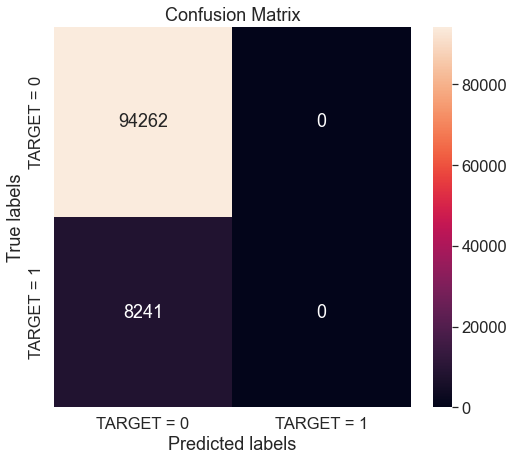

In [119]:
plot_dectree2 = confusion_matrix(y_testDT, y_predtree2)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(plot_dectree2, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])
ax.yaxis.set_ticklabels(['TARGET = 0', 'TARGET = 1'])

# Learning Curve

#Before Hyperparameter Tuning

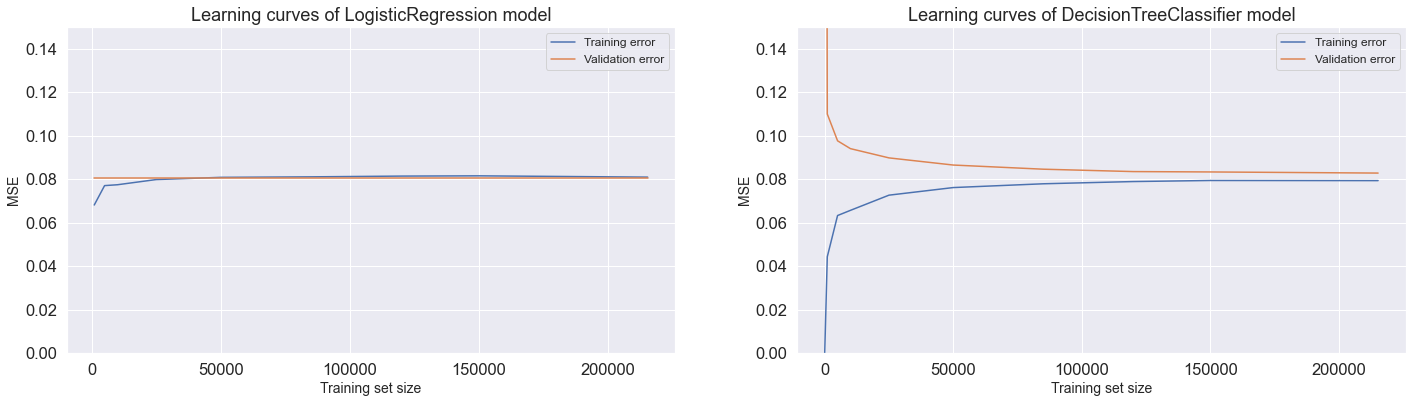

In [120]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves of ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18)
    plt.legend(fontsize=12)
    plt.ylim(0,0.15)

### Plotting the two learning curves ###

features = encode_train.drop(['SK_ID_CURR','TARGET'], axis=1).columns
target = 'TARGET'


train_sizes = [1,1000,5000,10000,25000,50000,85000,120000,150000,215254]


plt.figure(figsize = (24,6))
plt.title('Before Hyperparameter Tuning')

for model, i in [(LogisticRegression(), 1), (tree.DecisionTreeClassifier(),2)]:
    plt.subplot(1,2,i)
    plot_learning_curves(model, encode_train, features, target, train_sizes, 5)

#After Hyperparameter Tuning

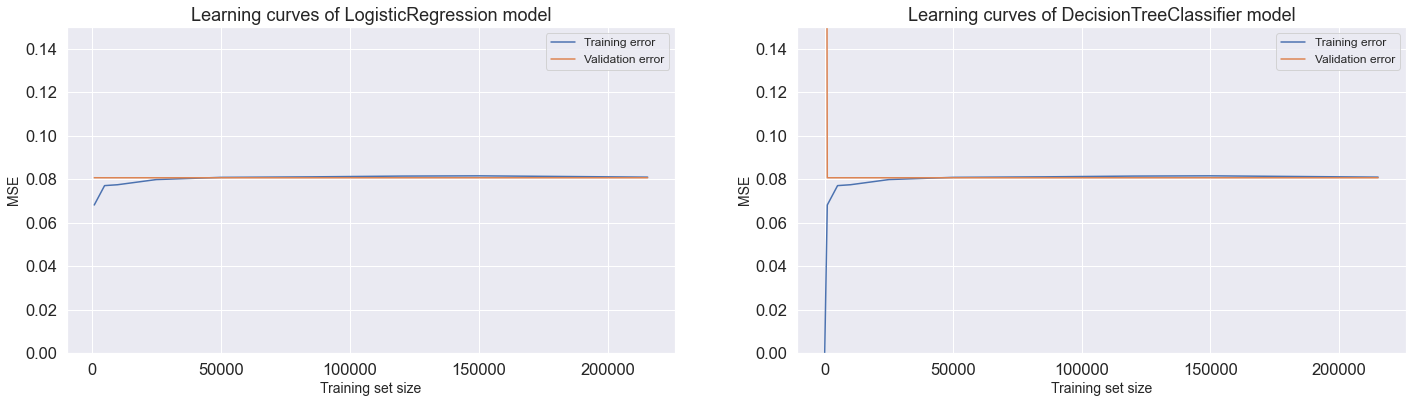

In [121]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves of ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18)
    plt.legend(fontsize=12)
    plt.ylim(0,0.15)

### Plotting the two learning curves ###

features = encode_train.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns
target = 'TARGET'


train_sizes = [1,1000,5000,10000,25000,50000,85000,120000,150000,215254]

plt.figure(figsize = (24,6))
plt.title('Before Hyperparameter Tuning')

for model, i in [(LogisticRegression(C=10,penalty='l2',solver='lbfgs'),1), (tree.DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2,min_samples_split=2),2)]:
    plt.subplot(1,2,i)
    plot_learning_curves(model, encode_train, features, target, train_sizes, 5)

# E. Prediksi Data Testing

In [122]:
#read data test
df_test = pd.read_csv('C:/Users/hp/Documents/Data Science/Virtual Internship/Home Credit/Tugas 4/home-credit-default-risk/application_test.csv')
df_test.columns[df_test.isnull().any()]

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPART

In [123]:
df_test_pick = df_test[['SK_ID_CURR', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']]

In [124]:
df_test_pick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   CODE_GENDER                  48744 non-null  object 
 2   NAME_CONTRACT_TYPE           48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   REGION_RATING_CLIENT_W_CITY  48744 non-null  int64  
 6   CNT_CHILDREN                 48744 non-null  int64  
 7   AMT_INCOME_TOTAL             48744 non-null  float64
 8   AMT_CREDIT                   48744 non-null  float64
 9   NAME_EDUCATION_TYPE          48744 non-null  object 
 10  NAME_HOUSING_TYPE            48744 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [125]:
income = df_test_pick['AMT_INCOME_TOTAL']
child = df_test_pick['CNT_CHILDREN']
credit = df_test_pick['AMT_CREDIT']

df_test_pick['income_cat'] = income.apply(lambda x: '<100k' if x<100000 else ('100k-250k' if x>=100000 and x<=250000 else ('250k-500k' if x>250000 and x<= 500000 else '>500k')))
df_test_pick['credit_cat'] = income.apply(lambda x: '<100k' if x<100000 else ('100k-500k' if x>=100000 and x<=500000 else ('500k-1mio' if x>500000 and x<= 1000000 else '>1mio')))
df_test_pick['child_cat'] = child.apply(lambda x: 0 if x==0 else (1 if x==1 else (2 if x==2 else '>2')))

In [126]:
df_test_pick.drop(['AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT'], axis = 1, inplace = True)
df_test_pick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SK_ID_CURR                   48744 non-null  int64 
 1   CODE_GENDER                  48744 non-null  object
 2   NAME_CONTRACT_TYPE           48744 non-null  object
 3   FLAG_OWN_CAR                 48744 non-null  object
 4   FLAG_OWN_REALTY              48744 non-null  object
 5   REGION_RATING_CLIENT_W_CITY  48744 non-null  int64 
 6   NAME_EDUCATION_TYPE          48744 non-null  object
 7   NAME_HOUSING_TYPE            48744 non-null  object
 8   NAME_INCOME_TYPE             48744 non-null  object
 9   income_cat                   48744 non-null  object
 10  credit_cat                   48744 non-null  object
 11  child_cat                    48744 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.5+ MB


In [127]:
#Encode Train
encode_test = pd.get_dummies(df_test_pick, columns = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE','NAME_INCOME_TYPE','income_cat', 'credit_cat', 'child_cat'])

encode_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   SK_ID_CURR                                         48744 non-null  int64
 1   CODE_GENDER_F                                      48744 non-null  uint8
 2   CODE_GENDER_M                                      48744 non-null  uint8
 3   NAME_CONTRACT_TYPE_Cash loans                      48744 non-null  uint8
 4   NAME_CONTRACT_TYPE_Revolving loans                 48744 non-null  uint8
 5   FLAG_OWN_CAR_N                                     48744 non-null  uint8
 6   FLAG_OWN_CAR_Y                                     48744 non-null  uint8
 7   FLAG_OWN_REALTY_N                                  48744 non-null  uint8
 8   FLAG_OWN_REALTY_Y                                  48744 non-null  uint8
 9   REGION_RATING_CLIENT_W_CITY_

# Data Test Prediction

In [128]:
X_test = encode_test.drop(['SK_ID_CURR'], axis=1)

In [129]:
df_test_pick[df_test_pick.index.duplicated()]

,SK_ID_CURR,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,income_cat,credit_cat,child_cat


In [163]:
y_test_pred = dectree2.predict(X_test)

In [164]:
y_test_pred.shape

(48744,)

In [165]:
y_test_pred_df = pd.DataFrame(y_test_pred)

In [166]:
y_test_pred_df[y_test_pred_df.index.duplicated()]

,0


In [167]:
#df_test_pick['TARGET'] = y_test_pred_df
df_test_pick_overall = pd.merge(df_test_pick,y_test_pred_df,how='left', left_index=True, right_index=True)

In [168]:
df_test_pick_overall = df_test_pick_overall.rename(columns={0:'TARGET'})

In [169]:
df_test_pick_overall.head()

,SK_ID_CURR,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,income_cat,credit_cat,child_cat,TARGET
0,100001,F,Cash loans,N,Y,2,Higher education,House / apartment,Working,100k-250k,100k-500k,0,0
1,100005,M,Cash loans,N,Y,2,Secondary / secondary special,House / apartment,Working,<100k,<100k,0,0
2,100013,M,Cash loans,Y,Y,2,Higher education,House / apartment,Working,100k-250k,100k-500k,0,0
3,100028,F,Cash loans,N,Y,2,Secondary / secondary special,House / apartment,Working,250k-500k,100k-500k,2,0
4,100038,M,Cash loans,Y,N,2,Secondary / secondary special,House / apartment,Working,100k-250k,100k-500k,1,0


In [138]:
#Pengelompokan data numerik non-ID df_test_pick

In [170]:
df_test_pick_overall.groupby(['TARGET']).count()

,SK_ID_CURR,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,income_cat,credit_cat,child_cat
TARGET,,,,,,,,,,,,
0,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744


# Feature Importance

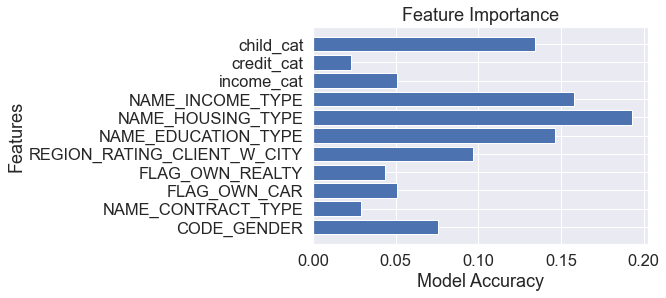

In [139]:
X = data_train_feat.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = data_train_feat['TARGET']

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE', 'income_cat','credit_cat','child_cat'))
plt.grid(True)